### Saldías et al. Figure 02

Waves - ssh anomaly (canyon minus no-canyon), allowed and scattered waves

In [1]:
from brokenaxes import brokenaxes
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gspec
import matplotlib.patches as patches
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import scipy as sc
import scipy.io as sio
import xarray as xr

import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

%matplotlib inline
%matplotlib inline

In [2]:
def get_fig_file(file_fig):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
 
    # (u is cross-shore and v is alongshore in Brink.)
    p0, u0, v0, w0, r0 = file['p_profile'], file['u_profile'],file['v_profile'], file['w_profile'], file['r_profile']

    scale=0.2
    w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    return(u,v,w,r,p,z,xpl, xxx, zzz)

def plot_Brink(ax,fld,z,xpl,xxx,zzz,minp,maxp,nlev=15):
    landc='#8b7765'
    levels=np.linspace(minp,maxp,nlev)
    cnf = ax.contourf(xpl, z, fld, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                      vmax=maxp, zorder=1)
    ax.contour(xpl, z, fld, levels=levels, linewidths=1, linestyles='-', colors='0.4', zorder=2)
    ax.contour(xpl, z, fld, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    levels=np.linspace(np.nanmin(v),np.nanmax(v),nlev)
    return(cnf, ax)  

In [3]:
runs = ['DS','IS','SS']

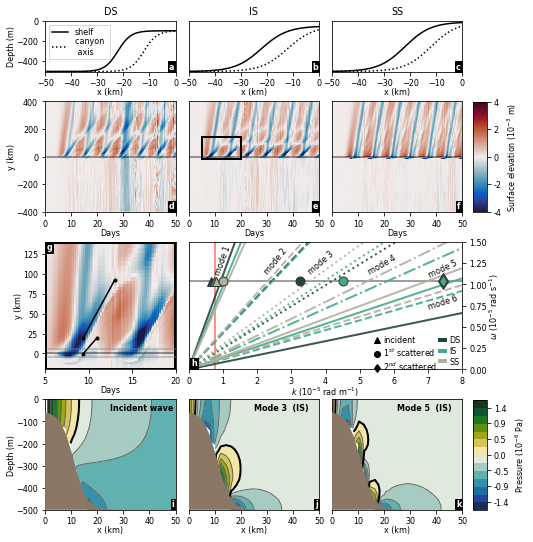

In [4]:
fig = plt.figure(figsize=(7.48,9))
plt.rcParams.update({'font.size': 8})

# Set up subplot grid
gs = GridSpec(4, 3, width_ratios=[1,1,1], height_ratios=[0.6,1.3,1.5,1.3],
              wspace=0.1,hspace=0.3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1:])
ax9 = fig.add_subplot(gs[3, 0])
ax10 = fig.add_subplot(gs[3, 1])
ax11 = fig.add_subplot(gs[3, 2])

for ax in [ax2,ax3,ax5,ax6,ax10,ax11]:
    ax.set_yticks([])
    
for ax,run in zip([ax1,ax2,ax3],runs):
    ax.set_xlabel('x (km)', labelpad=0)
    ax.set_title(run)

for ax in [ax4,ax5,ax6,ax7]:
    ax.set_xlabel('Days', labelpad=0)

for ax in [ax9,ax10,ax11]:
    ax.set_xlabel('x (km)', labelpad=0)

ax1.set_ylabel('Depth (m)', labelpad=0)
ax4.set_ylabel('y (km)', labelpad=0)
ax7.set_ylabel('y (km)', labelpad=0)
ax9.set_ylabel('Depth (m)', labelpad=0)
ax8.set_xlabel(r'$k$ ($10^{-5}$ rad m$^{-1}$)', labelpad=0)
ax8.set_ylabel(r'$\omega$ ($10^{-5}$ rad s$^{-1}$)', labelpad=0.5)
ax8.yaxis.set_label_position("right")
ax8.yaxis.tick_right()

# Shelf profiles
for run, ax in zip(runs, [ax1,ax2,ax3]):
    can_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_CR_'+run+'_7d.nc'
    yshelf = 400
    yaxis = int(579/2)
    with Dataset(can_file, 'r') as nbl:
        hshelf = -nbl.variables['h'][yshelf,:]
        haxis = -nbl.variables['h'][yaxis,:]
        x_rho = (nbl.variables['x_rho'][:]-400E3)/1000
        y_rho = (nbl.variables['y_rho'][:]-400E3)/1000 
    ax.plot(x_rho[yshelf,:], hshelf,'k-', label='shelf')
    ax.plot(x_rho[yaxis,:], haxis,'k:', label='canyon \n axis')
    ax.set_xlim(-50,0)
    ax.set_ylim(-500,0)
ax1.legend(labelspacing=0)    
    
#SSH hovmöller plots (canyon-no canyon)
xind = 289
for run, ax in zip(runs,(ax4,ax5,ax6)):
    nc_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_NCR_'+run+'_7d.nc'
    can_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_CR_'+run+'_7d.nc'

    with Dataset(can_file, 'r') as nbl:
        y_rho = nbl.variables['y_rho'][:]
        time = nbl.variables['ocean_time'][:]
        zeta = nbl.variables['zeta'][:,:,xind]

    with Dataset(nc_file, 'r') as nbl:
        y_rho_nc = nbl.variables['y_rho'][:]
        time_nc = nbl.variables['ocean_time'][:]
        zeta_nc = nbl.variables['zeta'][:,:,xind]
    
    pc2 = ax.pcolormesh((time_nc)/(3600*24),(y_rho_nc[:,xind]/1000)-400,
                        np.transpose((zeta[:,:]-zeta_nc[:,:]))*1000,
                        cmap=cmo.cm.balance, vmax=4.0, vmin=-4.0)
    if run == 'IS':
        rect = patches.Rectangle((5,-20),15,160,linewidth=2,edgecolor='k',facecolor='none')
        ax.add_patch(rect)

    ax.axhline(0.0, color='k', alpha=0.5)
    ax.set_ylim(-400,400)
cbar_ax = fig.add_axes([0.92, 0.585, 0.025, 0.17])
cb = fig.colorbar(pc2, cax=cbar_ax, orientation='vertical', format='%1.0f')
cb.set_label(r'Surface elevation (10$^{-3}$ m)')

# Zoomed-in SSH hovmöller plot of IS (canyon-no canyon)
yind = 420
xlim = 100
xind = 289
y1 = 189
y2 = 389
y3 = 526
y4 = 540
y5 = 315

run = 'IS'
ax = ax7
nc_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_NCR_'+run+'_7d.nc'
can_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_CR_'+run+'_7d.nc'

with Dataset(can_file, 'r') as nbl:
    y_rho = nbl.variables['y_rho'][:]
    time = nbl.variables['ocean_time'][:]
    zeta = nbl.variables['zeta'][:,:,xind]

with Dataset(nc_file, 'r') as nbl:
    y_rho_nc = nbl.variables['y_rho'][:]
    time_nc = nbl.variables['ocean_time'][:]
    zeta_nc = nbl.variables['zeta'][:,:,xind]
    
pc2 = ax.pcolormesh((time_nc)/(3600*24),(y_rho_nc[:,xind]/1000)-400,
                    np.transpose((zeta[:,:]-zeta_nc[:,:]))*1000,
                    cmap=cmo.cm.balance, vmax=4.0, vmin=-4.0)

t1_IS = (time_nc[47])/(3600*24)
y1_IS = (y_rho_nc[y2,xind]/1000)-400
t2_IS = (time_nc[65])/(3600*24)
y2_IS = (y_rho_nc[y4,xind]/1000)-400
ax.plot([t1_IS, t2_IS],[y1_IS, y2_IS], '.-', color='k')

t1_IS = (time_nc[47])/(3600*24)
y1_IS = (y_rho_nc[289,xind]/1000)-400
t2_IS = (time_nc[55])/(3600*24)
y2_IS = (y_rho_nc[y2,xind]/1000)-400
ax.plot([t1_IS, t2_IS],[y1_IS, y2_IS], '.-',color='k')


ax.axhline(0.0, color='k', alpha=0.5)
ax.axhline(-5.0, color='0.5', alpha=0.5)
ax.axhline(5.0, color='0.5', alpha=0.5)
ax.set_ylim(-20,140)
ax.set_xlim(5,20)
rect = patches.Rectangle((5.1,-19),14.85,158,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(rect)

# Dispersion curves
g = 9.81  # gravitational accel. m/s^2
Hs = 100  # m shelf break depth
f = 1.028E-4  # inertial frequency
omega_fw = 1.039E-5 # fw = forcing wave
k_fw = 6.42E-6# rad/m
domain_length = 800E3 # m
canyon_width = 10E3 # m

col1 = '#254441' #'#23022e'
col2 = '#43AA8B' #'#573280'
col3 = '#B2B09B' #'#ada8b6'
col4 = '#FF6F59' #'#58A4B0'

files = ['../dispersion_curves/DS/dispc_DS_mode1_KRM.dat',
         '../dispersion_curves/IS/dispc_IS_mode1_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode1_KRM.dat',
         '../dispersion_curves/DS/dispc_DS_mode2_KRM.dat',
         '../dispersion_curves/IS/dispc_IS_mode2_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode2_KRM.dat',
         '../dispersion_curves/DS/dispc_DS_mode3_KRM.dat',
         '../dispersion_curves/IS/dispc_IS_mode3_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode3_KRM.dat',
         '../dispersion_curves/IS/dispc_IS_mode4_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode4_KRM.dat',
         '../dispersion_curves/DS/dispc_DS_mode5_KRM.dat', 
         '../dispersion_curves/IS/dispc_IS_mode5_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode5_KRM.dat',
         '../dispersion_curves/IS/dispc_IS_mode6_KRM.dat',
         '../dispersion_curves/SS/dispc_SS_mode6_KRM.dat',
        ]
colors = [col1,
          col2,
          col3,
          col1,
          col2,
          col3,
          col1,
          col2,
          col3,
          col2,
          col3,
          col1,
          col2,
          col3,
          #col1,
          col2,
          col3,
         ]
linestyles = ['-','-','-','--','--','--',':',':',':','-.','-.','-','-','-','--','--']
labels = [ r'DS $\bar{c_1}$',r'IS $\bar{c_1}$',r'SS $\bar{c_1}$',
          r'DS $\bar{c_2}$',r'IS $\bar{c_2}$',r'SS $\bar{c_2}$',
          r'DS $\bar{c_3}$',r'IS $\bar{c_3}$',r'SS $\bar{c_3}$',
          r'IS $\bar{c_4}$',r'SS $\bar{c_4}$',
          r'DS $\bar{c_5}$',r'IS $\bar{c_5}$',r'SS $\bar{c_5}$',
          r'IS $\bar{c_6}$',r'SS $\bar{c_6}$']

ax8.axhline(omega_fw*1E5, color='0.5', label='1/7 days')
ax8.axhline(f*1E5, color='gold', label='f')
ax8.axvline((1E5*(2*np.pi))/domain_length, linestyle='-', color=col4, alpha=1, label='domain length')

for file, col, lab, line in zip(files, colors, labels, linestyles):
    data_mode = pd.read_csv(file, delim_whitespace=True, header=None, names=['wavenum', 'freq', 'perturbation'])
    omega = data_mode['freq'][:]
    k = data_mode['wavenum'][:]*100
    ax8.plot(k*1E5, omega*1E5, linestyle=line,
             color=col,linewidth=2,alpha=0.9,
             label=lab+r'=%1.2f ms$^{-1}$' % (np.mean(omega/k)))

ax8.plot((omega_fw/1.59)*1E5, omega_fw*1E5, '^',color=col1, 
          markersize=9, label = 'incident DS %1.2f' %(1.59),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/1.39)*1E5, omega_fw*1E5, '^',color=col2, 
          markersize=9, label = 'incident IS %1.2f' %(1.39),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/1.29)*1E5, omega_fw*1E5, '^',color=col3, 
          markersize=9, label = 'incident SS %1.2f' %(1.29),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/0.32)*1E5, omega_fw*1E5, 'o',color=col1, 
          markersize=9, label = 'DS model c=%1.2f m/s' %(0.32),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/0.23)*1E5, omega_fw*1E5, 'o',color=col2, 
          markersize=9, label = 'IS model c=%1.2f m/s' %(0.23),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/1.04)*1E5, omega_fw*1E5, 'o',color=col3, 
          markersize=9, label = 'SS model c=%1.2f m/s' %(1.04),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/0.14)*1E5, omega_fw*1E5, 'd',color=col1, 
          markersize=11, label = 'DS model c=%1.2f m/s' %(0.14),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.plot((omega_fw/0.14)*1E5, omega_fw*1E5, 'd',color=col2, 
          markersize=9, label = 'IS model c=%1.2f m/s' %(0.14),
          markeredgecolor='0.2',markeredgewidth=1)

ax8.set_ylim(0, 1.5)
ax8.set_xlim(0,8)

legend_elements=[]

legend_elements.append(Line2D([0], [0], marker='^',color='w', label='incident',
                           markerfacecolor='k', mec='k',markersize=6))
legend_elements.append(Line2D([0], [0], marker='o',color='w', label='1$^{st}$ scattered',
                           markerfacecolor='k', mec='k',markersize=6))
legend_elements.append(Line2D([0], [0], marker='d',color='w', label='2$^{nd}$ scattered',
                           markerfacecolor='k', mec='k',markersize=6))

for col, run in zip([col1,col2,col3], runs):
    legend_elements.append(Line2D([0], [0], marker='s',color=col, linewidth=4,label=run,
                           markerfacecolor=col, mec=col, markersize=0))

ax8.legend(handles=legend_elements, bbox_to_anchor=(0.65,0.32),frameon=False, handlelength=0.7,
           handletextpad=0.5, ncol=2,columnspacing=0.25, framealpha=0, edgecolor='w',labelspacing=0.2)

# Mode structure (Modes 1, 4 and 6 IS run)
run='IS'
modes = ['mode1','mode3', 'mode5']
for mode, ax in zip(modes, [ax9,ax10,ax11]):
    u,v,w,r,p,z,xpl,xxx,zzz = get_fig_file('../dispersion_curves/'+run+'/figures_'+run+'_'+mode+'_KRM.mat')
    minp = -(1.66e-06)*1E6
    maxp = (1.66e-06)*1E6
    cntf, ax = plot_Brink(ax, p*1E6, z, xpl, xxx, zzz, minp, maxp)
    ax.set_xlim(0,50)
cbar_ax = fig.add_axes([0.92, 0.125, 0.025, 0.17])
cb = fig.colorbar(cntf, cax=cbar_ax, orientation='vertical', format='%1.1f')
cb.set_label(r'Pressure (10$^{-6}$ Pa)')

ax9.text(0.5,0.9,'Incident wave',transform=ax9.transAxes, fontweight='bold')
ax10.text(0.5,0.9,'Mode 3  (IS)',transform=ax10.transAxes, fontweight='bold')
ax11.text(0.5,0.9,'Mode 5  (IS)',transform=ax11.transAxes, fontweight='bold')

ax8.text(0.09,0.75,'mode 1',transform=ax8.transAxes,rotation=70 )
ax8.text(0.27,0.75,'mode 2',transform=ax8.transAxes,rotation=51 )
ax8.text(0.43,0.75,'mode 3',transform=ax8.transAxes,rotation=41 )
ax8.text(0.65,0.75,'mode 4',transform=ax8.transAxes,rotation=30 )
ax8.text(0.87,0.72,'mode 5',transform=ax8.transAxes,rotation=25 )
ax8.text(0.87,0.47,'mode 6',transform=ax8.transAxes,rotation=18 )

ax1.text(0.95,0.05,'a',transform=ax1.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax2.text(0.95,0.05,'b',transform=ax2.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax3.text(0.95,0.05,'c',transform=ax3.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})

ax4.text(0.95,0.03,'d',transform=ax4.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax5.text(0.95,0.03,'e',transform=ax5.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax6.text(0.96,0.03,'f',transform=ax6.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})


ax7.text(0.01,0.94,'g',transform=ax7.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax8.text(0.01,0.03,'h',transform=ax8.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})

ax9.text(0.97,0.03,'i',transform=ax9.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax10.text(0.97,0.03,'j',transform=ax10.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})
ax11.text(0.95,0.03,'k',transform=ax11.transAxes, fontsize=8, fontweight='bold',
         color='w', bbox={'facecolor': 'black', 'alpha': 1, 'pad': 1})

plt.savefig('Figure2.png',format='png',bbox_inches='tight', dpi=300)
plt.show()